In [11]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.manifold import TSNE
from src.data.synthetic_gen import DataLoader
from src.utils.constants import FEATURES_NAMES

In [12]:
wgan_dl = DataLoader(problem="classification", model_name="WGAN #11", dataset_size=10)
dirichlet_dl = DataLoader(problem="classification", model_name="Dirichlet Estimator", dataset_size=10)

wgan_datasets, minmax = wgan_dl.load_cross_validation_datasets()
dirichlet_datasets, minmax = dirichlet_dl.load_cross_validation_datasets()

In [13]:
wgan_synthetic = wgan_datasets["train"][0]["features"].loc[:, FEATURES_NAMES]
dirichlet_synthetic = dirichlet_datasets["train"][0]["features"].loc[:, FEATURES_NAMES]

real = wgan_datasets["valid"][0]["features"].loc[:, FEATURES_NAMES]

print(wgan_synthetic.shape)
print(dirichlet_synthetic.shape)
print(real.shape)

(3330, 26)
(3330, 26)
(55, 26)


In [14]:
wgan_synthetic.loc[:, "dataset"] = 0
dirichlet_synthetic.loc[:, "dataset"] = 1
real.loc[:, "dataset"] = 2

data = pd.concat([wgan_synthetic, dirichlet_synthetic, real], axis=0)
data

,zN2,zCO2,zC1,zC2,zC3,zIC4,zNC4,zIC5,zNC5,zC6,...,zC14,zC15,zC16,zC17,zC18,zC19,zC20,P,T,dataset
0,0.004636,0.018318,0.489193,0.065936,0.035416,0.006414,0.016064,0.005370,0.009219,0.012208,...,0.011328,0.010342,0.009230,0.008276,0.007833,0.008811,0.160531,-0.003353,0.517879,0
1,0.004763,0.006286,0.336458,0.065264,0.042863,0.007515,0.015128,0.003423,0.007285,0.012027,...,0.022890,0.017098,0.013241,0.016347,0.012961,0.013650,0.276110,-0.000574,0.554099,0
2,0.003490,0.104020,0.495888,0.064407,0.045761,0.005185,0.013938,0.005475,0.006353,0.011456,...,0.008112,0.007278,0.005351,0.004246,0.005287,0.004108,0.117091,0.078236,0.552407,0
3,0.005723,0.031545,0.528527,0.085891,0.051431,0.008938,0.020164,0.009285,0.011611,0.013363,...,0.009347,0.008939,0.006462,0.005458,0.006142,0.005386,0.088894,0.132728,0.534438,0
4,0.004665,0.056012,0.459645,0.046581,0.031939,0.005690,0.011360,0.005641,0.006156,0.010711,...,0.017696,0.012412,0.010782,0.010000,0.011412,0.009865,0.175762,0.280918,0.521671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.005000,0.011000,0.387700,0.071600,0.058600,0.010100,0.028200,0.009900,0.015400,0.019900,...,0.026400,0.019700,0.013200,0.011200,0.011100,0.010100,0.106600,0.338194,0.349011,2
51,0.005100,0.036500,0.551300,0.065000,0.045100,0.009000,0.019100,0.006700,0.010400,0.015800,...,0.009500,0.009500,0.007200,0.006400,0.006200,0.005900,0.086800,0.314945,0.122999,2
52,0.000700,0.000100,0.467800,0.016100,0.009700,0.002000,0.004500,0.001700,0.002200,0.003400,...,0.018400,0.019100,0.018200,0.011600,0.014800,0.011900,0.316600,0.036857,0.527363,2
53,0.000700,0.019000,0.493400,0.028100,0.006600,0.001600,0.003400,0.001100,0.001500,0.002800,...,0.020800,0.018400,0.018100,0.015100,0.014600,0.017000,0.240600,0.414905,0.273385,2


In [26]:
tsne = TSNE(n_components=2, perplexity=30)
reduced_data = tsne.fit_transform(data.loc[:, FEATURES_NAMES])

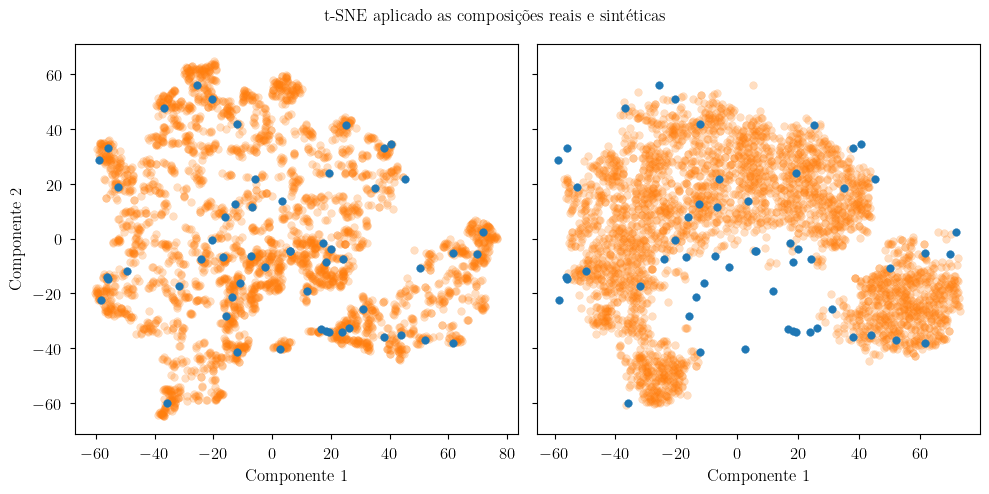

In [32]:
f, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

for i, model in enumerate(["WGAN", "Dirichlet"]):
    axs[i].scatter(reduced_data[data["dataset"] == i, 0], reduced_data[data["dataset"] == i, 1], c="tab:orange", label=model, alpha=0.25)
    axs[i].scatter(reduced_data[data["dataset"] == 2, 0], reduced_data[data["dataset"] == 2, 1], c="tab:blue", label="Real")
    axs[i].set_xlabel("Componente 1")

axs[0].set_ylabel("Componente 2")
f.suptitle("t-SNE aplicado as composições reais e sintéticas")
f.tight_layout()
plt.show()